In [1]:
# rotation matirx의 지수 표현 -> rodrigues formula

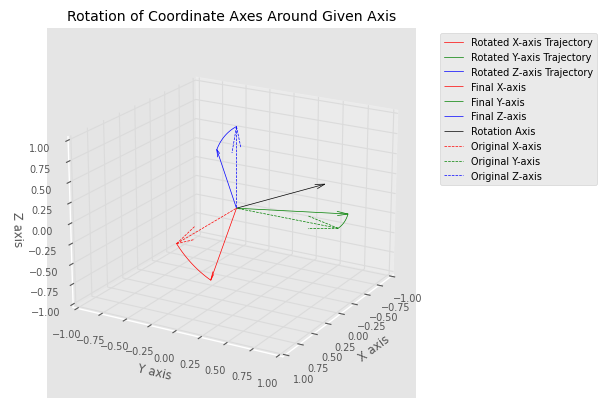

In [35]:
# 회전의 지수 좌표
# 예제 3.1. exp([w]theta) -> R 구하기
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 로드리게스 회전 공식 함수
def rodrigues_rotation(v, theta):
    # 주어진 축 (0, 0.866, 0.5)에 대한 skew 대칭 행렬
    skew_matrix = np.array([[0, -0.5, 0.866],
                            [0.5, 0, -0],
                            [-0.866, 0, 0]])
    
    # 로드리게스 공식 적용
    rotation_matrix = np.eye(3) + np.sin(theta) * skew_matrix + (1 - np.cos(theta)) * (skew_matrix @ skew_matrix)
    
    # 회전 행렬을 벡터에 적용
    return rotation_matrix @ v

# 회전 축과 각도 범위 설정
axis = np.array([0, 0.866, 0.5])  # 주어진 회전 축
theta_values = np.linspace(0, 0.524, 100)  # 0부터 0.524 rad까지

# 기존 좌표계의 각 축 벡터
x_axis = np.array([1, 0, 0])
y_axis = np.array([0, 1, 0])
z_axis = np.array([0, 0, 1])

# 3D 플롯 설정
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 회전 후 벡터들의 트레젝토리 저장
rotated_x_vectors = []
rotated_y_vectors = []
rotated_z_vectors = []

for theta in theta_values:
    # 각 좌표축 회전
    rotated_x_vectors.append(rodrigues_rotation(x_axis, theta))
    rotated_y_vectors.append(rodrigues_rotation(y_axis, theta))
    rotated_z_vectors.append(rodrigues_rotation(z_axis, theta))

# 회전된 좌표축들의 트레젝토리 플로팅
rotated_x_vectors = np.array(rotated_x_vectors)
rotated_y_vectors = np.array(rotated_y_vectors)
rotated_z_vectors = np.array(rotated_z_vectors)

# 트레젝토리 표시
ax.plot(rotated_x_vectors[:, 0], rotated_x_vectors[:, 1], rotated_x_vectors[:, 2], color='r', label='Rotated X-axis Trajectory')
ax.plot(rotated_y_vectors[:, 0], rotated_y_vectors[:, 1], rotated_y_vectors[:, 2], color='g', label='Rotated Y-axis Trajectory')
ax.plot(rotated_z_vectors[:, 0], rotated_z_vectors[:, 1], rotated_z_vectors[:, 2], color='b', label='Rotated Z-axis Trajectory')

# 회전된 최종 좌표축 표시 (화살표)
final_x = rotated_x_vectors[-1]
final_y = rotated_y_vectors[-1]
final_z = rotated_z_vectors[-1]

ax.quiver(0, 0, 0, final_x[0], final_x[1], final_x[2], color='r', length=1.0, arrow_length_ratio=0.1, label='Final X-axis')
ax.quiver(0, 0, 0, final_y[0], final_y[1], final_y[2], color='g', length=1.0, arrow_length_ratio=0.1, label='Final Y-axis')
ax.quiver(0, 0, 0, final_z[0], final_z[1], final_z[2], color='b', length=1.0, arrow_length_ratio=0.1, label='Final Z-axis')

# 회전 축 표시
ax.quiver(0, 0, 0, axis[0], axis[1], axis[2], color='k', length=1.0, arrow_length_ratio=0.1, label='Rotation Axis')

# 원래 좌표축도 표시
ax.quiver(0, 0, 0, x_axis[0], x_axis[1], x_axis[2], color='r', linestyle='--', label='Original X-axis')
ax.quiver(0, 0, 0, y_axis[0], y_axis[1], y_axis[2], color='g', linestyle='--', label='Original Y-axis')
ax.quiver(0, 0, 0, z_axis[0], z_axis[1], z_axis[2], color='b', linestyle='--', label='Original Z-axis')

# 레전드 위치 조정
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# 축 범위 고정
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# 카메라 시점 조정
ax.view_init(elev=20, azim=30)

# 축과 라벨 설정
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Rotation of Coordinate Axes Around Given Axis')
plt.show()


In [36]:
import sympy as sp

# 기호 정의
w_x, w_y, w_z, theta = sp.symbols('w_x w_y w_z theta')

# w의 벡터 형태로 표현된 기호 행렬 (반대칭 행렬)
w = sp.Matrix([[0, -w_z, w_y],
               [w_z, 0, -w_x],
               [-w_y, w_x, 0]])

# Rodrigues' rotation formula: R = I + sin(theta) * w + (1 - cos(theta)) * w^2
R = sp.eye(3) + sp.sin(theta) * w + (1 - sp.cos(theta)) * w * w

# 회전 행렬 출력
sp.pprint(R)

# w_x^2 + w_y^2 + w_z^2 = 1을 이용하면 Rodrigues' rotation formula의 꼴로 나온다.

⎡     2                   2                                                                                                       
⎢- w_y ⋅(1 - cos(θ)) - w_z ⋅(1 - cos(θ)) + 1       wₓ⋅w_y⋅(1 - cos(θ)) - w_z⋅sin(θ)            wₓ⋅w_z⋅(1 - cos(θ)) + w_y⋅sin(θ)   
⎢                                                                                                                                 
⎢                                                 2                   2                                                           
⎢     wₓ⋅w_y⋅(1 - cos(θ)) + w_z⋅sin(θ)        - wₓ ⋅(1 - cos(θ)) - w_z ⋅(1 - cos(θ)) + 1      -wₓ⋅sin(θ) + w_y⋅w_z⋅(1 - cos(θ))   
⎢                                                                                                                                 
⎢                                                                                             2                   2               
⎣     wₓ⋅w_z⋅(1 - cos(θ)) - w_y⋅sin(θ)             wₓ⋅sin(θ) + w_y⋅w_z⋅(1 - cos(θ))

In [37]:
import sympy as sp

# 기호 정의
w_x, w_y, w_z, theta = sp.symbols('w_x w_y w_z theta')

# w의 벡터 형태로 표현된 기호 행렬 (반대칭 행렬)
w = sp.Matrix([[0, -w_z, w_y],
               [w_z, 0, -w_x],
               [-w_y, w_x, 0]])
R  = w*w
# 회전 행렬 출력
sp.pprint(R)

print()
print("="*70)
print()

#theta = k * Pi이고, k가 홀수인 경우, R  = I + 2 * [w]^2
sp.pprint(sp.eye(3,3) + 2*R)


⎡     2      2                            ⎤
⎢- w_y  - w_z      wₓ⋅w_y        wₓ⋅w_z   ⎥
⎢                                         ⎥
⎢                   2      2              ⎥
⎢   wₓ⋅w_y      - wₓ  - w_z     w_y⋅w_z   ⎥
⎢                                         ⎥
⎢                                 2      2⎥
⎣   wₓ⋅w_z        w_y⋅w_z     - wₓ  - w_y ⎦


⎡       2        2                                                ⎤
⎢- 2⋅w_y  - 2⋅w_z  + 1        2⋅wₓ⋅w_y              2⋅wₓ⋅w_z      ⎥
⎢                                                                 ⎥
⎢                             2        2                          ⎥
⎢      2⋅wₓ⋅w_y         - 2⋅wₓ  - 2⋅w_z  + 1       2⋅w_y⋅w_z      ⎥
⎢                                                                 ⎥
⎢                                                   2        2    ⎥
⎣      2⋅wₓ⋅w_z              2⋅w_y⋅w_z        - 2⋅wₓ  - 2⋅w_y  + 1⎦


In [125]:
# 회전행렬의 행렬 로그
# R -> [w]theta 구하기
import numpy as np
import math
def rodrigues_rotation(w,theta):
    skew_matrix = np.array([[0, -w[2], w[1]],
                            [w[2], 0, -w[0]],
                            [-w[1], w[0], 0]])
    
    # 로드리게스 공식 적용
    rotation_matrix = np.eye(3) + np.sin(theta) * skew_matrix + (1 - np.cos(theta)) * (skew_matrix @ skew_matrix)
    
    print()
    print("="*50)
    
    print("theta:", theta)
    print()
    
    print("[w]:")
    print(skew_matrix)
    print()
    
    print("R:")
    print(rotation_matrix)
    

    return rotation_matrix

R_axis = np.array([0, 0.866, 0.5]) #이게 w가 임
R = rodrigues_rotation(R_axis, 0.524)

I = np.array([[1,0,0],
             [0,1,0],
             [0,0,1]])

# R.trace() == -1이 완벽히 성립하는 경우는 거의 없으니 오차범위 이내로 잡음
# R의 trace 값
trace_R = R.trace()
# 비교 값 설정 (-1)
target_value = -1
# 오차 허용 범위
tolerance_percentage = 0.01


if np.array_equal(I, R):
    print("theta는 0이고, w는 정의되지 않습니다.")
#elif R.trace() == -1:
elif abs(trace_R - target_value) <= abs(target_value) * tolerance_percentage:
    vec = np.array([R[0,2],R[1,2],1+R[2,2]])
    w = 1/math.sqrt(2*(1+R[2,2])) * vec
    print("[w]:")
    print(w)
else:
    theta = math.acos((R.trace()-1)/2)
    w_temp = (1/(2*math.sin(theta))) * (R - R.transpose())

    #이렇게 구한 w와 theta로 rotation matrix 만들어보기
    w = np.array([-w_temp[1,2],w_temp[0,2],-w_temp[0,1]])
    rodrigues_rotation(w,theta)





theta: 0.524

[w]:
[[ 0.    -0.5    0.866]
 [ 0.5    0.    -0.   ]
 [-0.866  0.     0.   ]]

R:
[[ 0.86583063 -0.25017372  0.43330087]
 [ 0.25017372  0.96645618  0.0580979 ]
 [-0.43330087  0.0580979   0.89937445]]

theta: 0.5239882006538814

[w]:
[[ 0.         -0.50001021  0.86601768]
 [ 0.50001021  0.          0.        ]
 [-0.86601768 -0.          0.        ]]

R:
[[ 0.86583105 -0.25017372  0.43330087]
 [ 0.25017372  0.96645629  0.05809771]
 [-0.43330087  0.05809771  0.89937476]]
